<a href="https://colab.research.google.com/github/rrameshh/poetryartgen/blob/main/poetryartgen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd
import random

# List to store all the poems and related metadata (titles, poets, tags)
rows = []

with open("PoetryFoundationData.csv", 'r') as file:

    csvreader = csv.reader(file)		# Reading the file
    header = next(csvreader) 			# Saving the column names to header

    for row in csvreader:
        rows.append(row) 				# Saving the poems and related metadata


# Splitting the poems into multiple lines by iterating through each poem
for entry in rows:

	entry[2].replace("\n", "\n\n")
	lines = entry[2].split("\n\n")
	lines = [y for y in lines if y != '']		# Removing blank lines from the poem
	entry.insert(2, lines) 						# Inserting the line-by-line split poem into the original list
	del entry[3]  								# Removing old unsplit poem
	entry.insert(3, len(lines))  				# Inserting a new column indicating the number of lines in the poem


header.insert(3, 'Poem Lines') 			# Inserting title for the new column of poem lines created above
print(header)

# Saving list as a pandas dataframe
df = pd.DataFrame(rows)
df.columns = header

# Removing poems with no lines (possibly a glitch on the Poetry Foundation website)
df.drop(df.index[df['Poem Lines'] == 0], inplace=True)
lines = df.groupby('Poem Lines')
# print(lines.first())

num_lines = 4 			# Required number of lines in the cento


def cento(data):
	"""
	Creates a new line in the cento by randomly picking a poem out of the dataframe, and randomly picking a line from the poem
	Parameters:
	data:  		Dataframe of poems that consists of the following columns- index, Title, Poem, Poem Lines, Poet, Tags
	Returns a random line from a random poem
	"""

	random_poem = random.randint(0, len(data)-1)
	random_line = random.randint(0, data['Poem Lines'][random_poem]-1)

	return data['Poem'][random_poem][random_line]



['', 'Title', 'Poem', 'Poem Lines', 'Poet', 'Tags']


In [2]:
# Creating the cento
totalpoem = ""
for n in range(num_lines):
  line = cento(df)
  totalpoem = totalpoem + line + " "
  print(line)

Ask about places to drink in the port.
broadly so the whole bed bends and bounces alive.
Or he to her, all that is utterly beyond me.
   Now droops the milk-white peacock like a ghost,


In [3]:
# Install keras-cv
!pip install --upgrade keras-cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.9/601.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 39.1 MB/s eta 0:00:00


In [4]:
# Model
from tensorflow import keras
import  keras_cv
keras.mixed_precision.set_global_policy("mixed_float16")

# Visualization
import matplotlib.pyplot as plt

# Save the image
from PIL import Image

Using TensorFlow backend


In [5]:
# Create a model
model = keras_cv.models.StableDiffusion(img_height=512,
                                        img_width=512,
                                        jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [6]:
def plot_images(images):
    # Set figure size
    plt.figure(figsize=(20, 20))
    # Loop through each image
    for i in range(len(images)):
        # Subplot setup
        ax = plt.subplot(1, len(images), i + 1)
        # Plot each image
        plt.imshow(images[i])
        # Do not show axis
        plt.axis("off")

198180272/198180272 [==============================] - 2s 0us/step


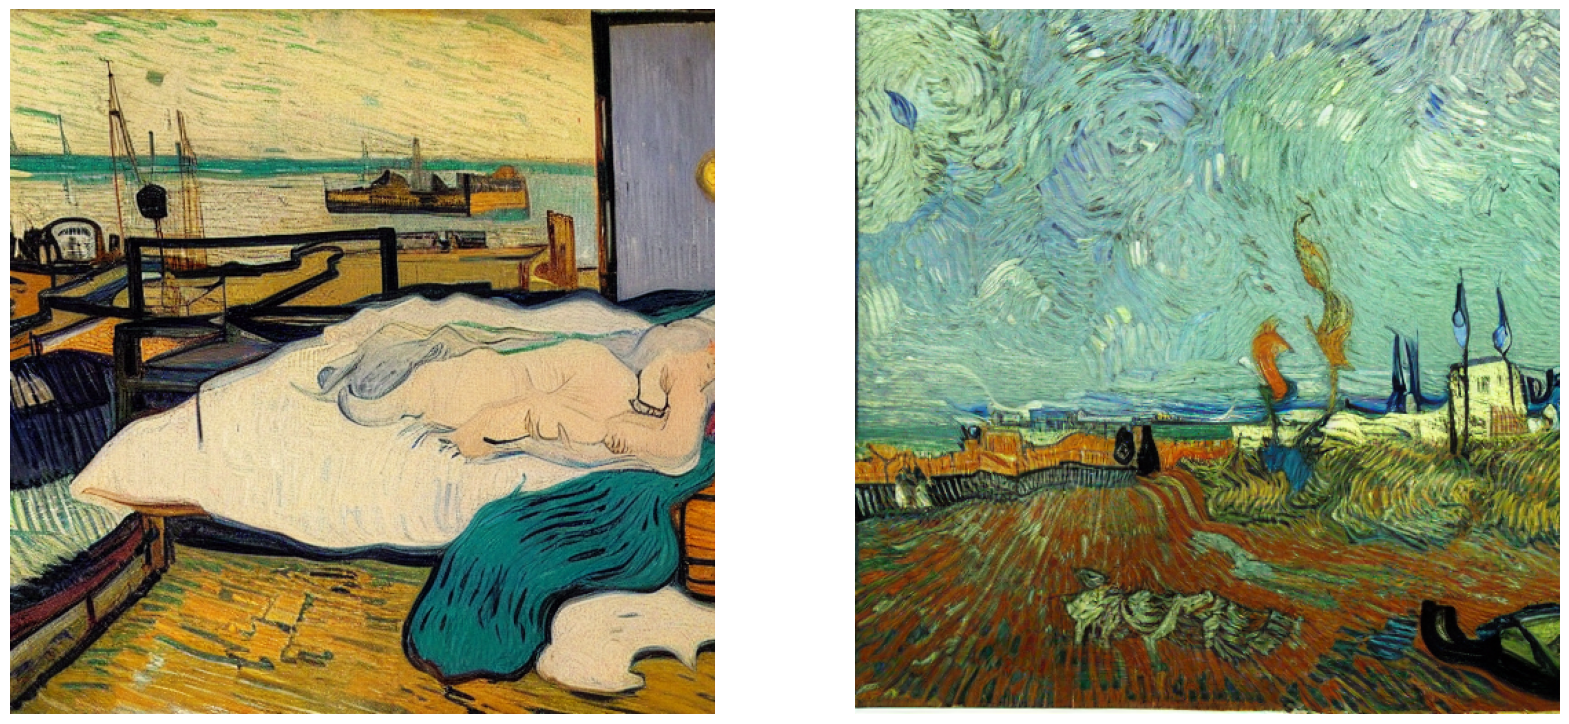

In [7]:
# Create images from text
totalpoem=totalpoem+""
images = model.text_to_image(prompt=totalpoem+" in the style of van gogh oil paintings",
                             batch_size=2)

# Plot the images
plot_images(images)
